In [3]:
import tensorflow as tf

In [4]:
import numpy as np

raw_data = np.genfromtxt('./datas/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

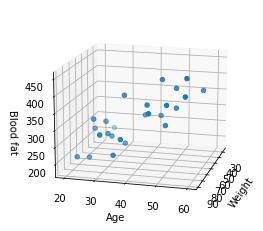

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15);

In [6]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)
y_data = y_data.reshape((25,1))

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, ))
])
model.compile(optimizer='rmsprop', loss='mse')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_data, y_data, epochs=5000)

/step - loss: 1893.8270
Epoch 4766/5000
1/1 [==============================] - 0s 4ms/step - loss: 1893.6904
Epoch 4767/5000
1/1 [==============================] - 0s 4ms/step - loss: 1893.5543
Epoch 4768/5000
1/1 [==============================] - 0s 3ms/step - loss: 1893.4187
Epoch 4769/5000
1/1 [==============================] - 0s 2ms/step - loss: 1893.2823
Epoch 4770/5000
1/1 [==============================] - 0s 3ms/step - loss: 1893.1473
Epoch 4771/5000
1/1 [==============================] - 0s 4ms/step - loss: 1893.0118
Epoch 4772/5000
1/1 [==============================] - 0s 3ms/step - loss: 1892.8771
Epoch 4773/5000
1/1 [==============================] - 0s 3ms/step - loss: 1892.7426
Epoch 4774/5000
1/1 [==============================] - 0s 3ms/step - loss: 1892.6089
Epoch 4775/5000
1/1 [==============================] - 0s 3ms/step - loss: 1892.4745
Epoch 4776/5000
1/1 [==============================] - 0s 4ms/step - loss: 1892.3414
Epoch 4777/5000
1/1 [====================

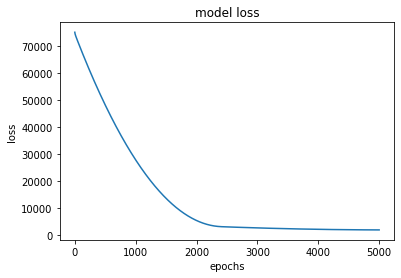

In [10]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs');

In [11]:
model.predict(np.array([100,44]).reshape(1,2))

array([[377.42603]], dtype=float32)

In [12]:
model.predict(np.array([60,25]).reshape(1,2))

array([[220.93622]], dtype=float32)

In [13]:
W_, b_ = model.get_weights()
print('Weight is:', W_)
print('bias is:', b_)

Weight is: [[1.365787]
 [5.360965]]
bias is: [4.9648733]


In [14]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

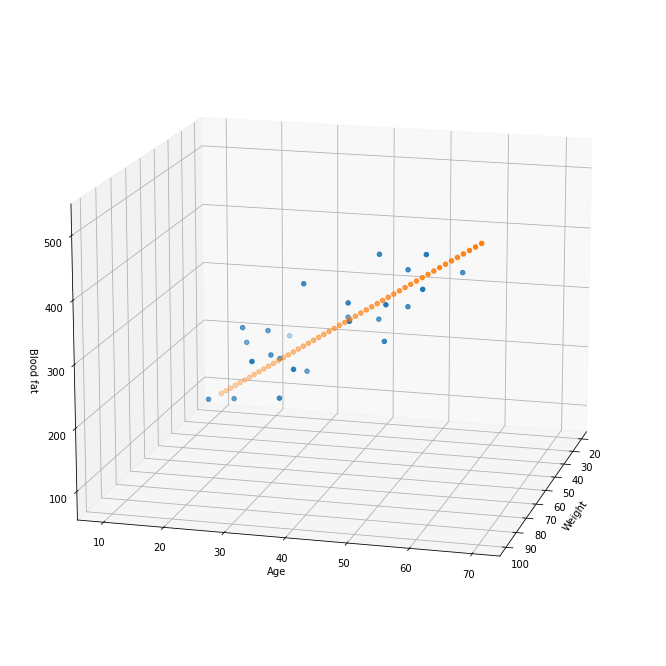

In [15]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15);

In [16]:
X = np.array([[0,0], [1,0], [0,1], [1,1]])
y = np.array([[0], [1], [1], [0]])

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [20]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

s 2ms/step - loss: 0.0033
Epoch 4758/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 4759/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 4760/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 4761/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 4762/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 4763/5000
4/4 [==============================] - 0s 1000us/step - loss: 0.0029
Epoch 4764/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 4765/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 4766/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 4767/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 4768/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 4769/5000
4/4 [==============================] - 0s 1ms/step - 

In [21]:
model.predict(X)

array([[0.04589763],
       [0.948929  ],
       [0.94901   ],
       [0.06494302]], dtype=float32)

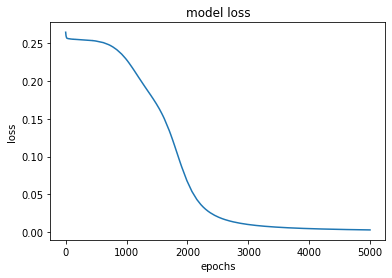

In [22]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs');

In [23]:
for w in model.weights:
    print('-----')
    print(w)

-----
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-3.9913242, -5.6215186],
       [-3.9970815, -5.650978 ]], dtype=float32)>
-----
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([5.8959675, 2.1259828], dtype=float32)>
-----
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 7.657849],
       [-8.018629]], dtype=float32)>
-----
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-3.5073335], dtype=float32)>


In [24]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [27]:
enc.categories_

[array([0, 1, 2])]

In [28]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [32]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1512 - accuracy: 0.3431
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9813 - accuracy: 0.4017
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9143 - accuracy: 0.7096
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8574 - accuracy: 0.6579
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8222 - accuracy: 0.6454
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7909 - accuracy: 0.6319
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7271 - accuracy: 0.6808
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6923
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.6965
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.8598
Epoch 11/100
4/4 [===========

In [33]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0852 - accuracy: 1.0000


[0.0851699560880661, 1.0]

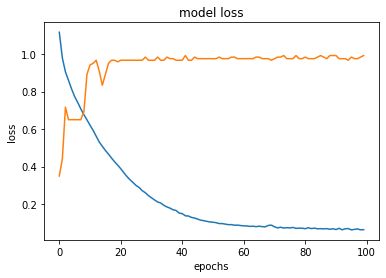

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs');